In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys 

# project_dir_path = '/home/onoue/ws/lukasiewicz_1'
project_dir_path = '/Users/keisukeonoue/ws/lukasiewicz_1'
sys.path.append(project_dir_path)

import cvxpy as cp 
import numpy as np 
import pandas as pd 

from src.setup_problem_dual import Setup

from src.objective_function_2 import ObjectiveFunction
from src.predicate import Predicate_dual

In [3]:
data_dir_path = "./../inputs/toy_data"

file_names_dict = {
    'supervised': ['L_p1.csv', 'L_p2.csv', 'L_p3.csv'],
    'unsupervised': ['U.csv'],
    'rule': ['rules.txt']
}

problem_instance = Setup(data_dir_path, file_names_dict, ObjectiveFunction, c1=10, c2=10)

objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

load_data took 0.0070650577545166016 seconds!
load_rules took 0.033660173416137695 seconds!
formulate_predicates_with_cvxpy took 0.0002739429473876953 seconds!
(6, 6)
no
_construct_P_j took 0.003877878189086914 seconds!


[ 1.87722899e+01+0.00000000e+00j  2.43771006e+00+0.00000000e+00j
 -6.90104006e-16+8.63084050e-16j -6.90104006e-16-8.63084050e-16j
  3.94916115e-16+1.97882913e-16j  3.94916115e-16-1.97882913e-16j
 -1.86666917e-16+0.00000000e+00j  1.13584381e-16+0.00000000e+00j
 -7.74763689e-17+0.00000000e+00j  2.84923453e-17+0.00000000e+00j
 -2.63004758e-17+0.00000000e+00j  4.46103704e-19+0.00000000e+00j
  1.74305124e-32+0.00000000e+00j -7.44813848e-33+0.00000000e+00j
 -3.56478251e-33+0.00000000e+00j  6.78894073e-34+0.00000000e+00j
  2.77070645e-34+0.00000000e+00j  1.39355514e-48+0.00000000e+00j
  5.11418349e-49+0.00000000e+00j -1.50956644e-52+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00

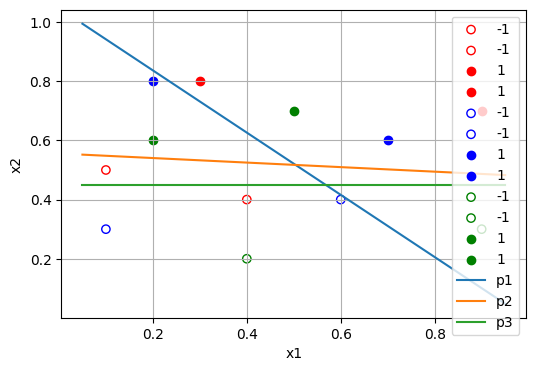

In [4]:
import matplotlib.pyplot as plt 


plt.figure(figsize=(6,4))

p1 = Predicate_dual(problem_instance, 'p1')
p2 = Predicate_dual(problem_instance, 'p2')
p3 = Predicate_dual(problem_instance, 'p3')



ps = [p1, p2, p3]

test_x = np.linspace(0.05, 0.95, 100).reshape(-1, 1)
test_ys = []

for p in ps:
    w1 = p.coeff[0]
    w2 = p.coeff[1]
    b  = p.coeff[2]

    x = np.hstack([test_x, np.ones_like(test_x)])
    w = np.array([-w1/w2, -b/w2 + 0.5/w2]).reshape(-1,1)

    test_ys.append(x @ w)


colors = ['red', 'blue', 'green']


for p, c in zip(ps, colors):
    for l in range(4):
        if p.L[l, -1] == 1:
            plt.scatter(p.L[l, 0], p.L[l, 1], c=c, marker='o', label='1')
        else:
            plt.scatter(p.L[l, 0], p.L[l, 1], facecolors='none', edgecolors=c, marker='o', label='-1')
        
for j, test_y in enumerate(test_ys):
    plt.plot(test_x, test_y, label=f'p{j+1}')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
p1 = Predicate_dual(problem_instance, 'p1')
p2 = Predicate_dual(problem_instance, 'p2')
p3 = Predicate_dual(problem_instance, 'p3')

print(f'p1: {p1.coeff}')
print(f'p2: {p2.coeff}')
print(f'p3: {p3.coeff}')

p1: [ 13.03730881  12.40043431 -12.48111683]
p2: [ 1.23105104 16.04351623 -8.41526644]
p3: [-8.91032570e-06  2.00001802e+00 -4.00003653e-01]


### 実装が正しければこうなるはず

```
p1 の w と b: [ 0.75   2.    -1.075]
p2 の w と b: [ 0.31976744  1.93604651 -0.6127907 ]
p3 の w と b: [ 4.4890372e-11  2.0000000e+00 -4.0000000e-01]
```

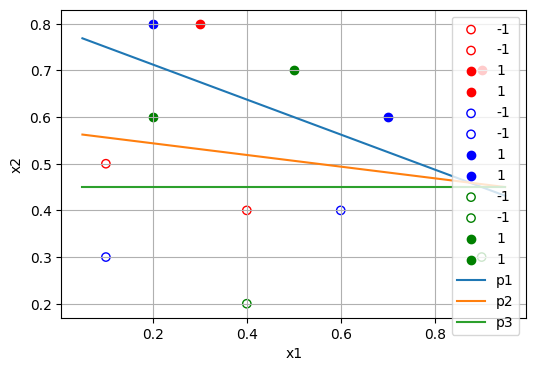

# pima indian 

In [6]:
data_dir_path = os.path.join(project_dir_path, 'inputs/pima_indian_diabetes')
train_data_dir_path = os.path.join(data_dir_path, "train")
file_list = os.listdir(train_data_dir_path)

L_files = [filename for filename in file_list 
           if filename.startswith('L') and filename.endswith('.csv')]

U_files = [filename for filename in file_list 
           if filename.startswith('U') and filename.endswith('.csv')]

file_names_dict = {
    'supervised': L_files,
    'unsupervised': U_files,
    'rule': ['rules.txt']
}

In [7]:
problem_instance = Setup(train_data_dir_path, file_names_dict, ObjectiveFunction)
objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

load_data took 0.05888509750366211 seconds!
1
0
0
Age_Low + BMI_Low + Glucose_Low + Outcome
1 - Age_Low - BMI_Low - Glucose_Low - Outcome
1
1
0
0
DiabetesPedigreeFunction_Medium + Glucose_High - Outcome + 1
1 - DiabetesPedigreeFunction_Medium - Glucose_High + Outcome - 1
1
1
0
0
-Age_Low - Outcome + Pregnancies_High + 2
1 + Age_Low + Outcome - Pregnancies_High - 2
1
1
0
0
-BMI_Low + Glucose_High - Outcome + 2
1 + BMI_Low - Glucose_High + Outcome - 2
1
1
0
0
DiabetesPedigreeFunction_High - Glucose_Low - Outcome + 2
1 - DiabetesPedigreeFunction_High + Glucose_Low + Outcome - 2
1
1
0
0
Age_Medium + BloodPressure_Low + DiabetesPedigreeFunction_Medium + Glucose_High + Glucose_Low - Outcome + SkinThickness_Low + 1
1 - Age_Medium - BloodPressure_Low - DiabetesPedigreeFunction_Medium - Glucose_High - Glucose_Low + Outcome - SkinThickness_Low - 1
1
1
0
0
Age_Low + Glucose_High - Outcome - Pregnancies_Medium + 2
1 - Age_Low - Glucose_High + Outcome + Pregnancies_Medium - 2
1
1
0
0
Age_Medium - B